<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [93]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [94]:
# Your code here
from bs4 import BeautifulSoup
import requests
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt



Download the webpage at the url


In [95]:
#your code goes here
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"
data = requests.get(url).text


Create a soup object


In [96]:
#your code goes here
soup = BeautifulSoup(data, 'html.parser')


Scrape the `Language name` and `annual average salary`.


In [97]:
#your code goes here
df = pd.DataFrame(columns=['Language Name', 'Annual Average Salary'])

for row in soup.find("tbody").find_all("tr"):
  col = row.find_all("td")
  language = col[1].getText()
  salary = col[3].getText()

  df = df.append({'Language Name' : language, 'Annual Average Salary' : salary}, ignore_index=True)

#drop first row
df.drop(index=df.index[0], axis=0, inplace=True)

print(df)



   Language Name Annual Average Salary
1         Python              $114,383
2           Java              $101,013
3              R               $92,037
4     Javascript              $110,981
5          Swift              $130,801
6            C++              $113,865
7             C#               $88,726
8            PHP               $84,727
9            SQL               $84,793
10            Go               $94,082


Save the scrapped data into a file named *popular-languages.csv*


In [98]:
# your code goes here
df.to_csv('popular-languages.csv')
df.head(10)


,Language Name,Annual Average Salary
1,Python,"$114,383"
2,Java,"$101,013"
3,R,"$92,037"
4,Javascript,"$110,981"
5,Swift,"$130,801"
6,C++,"$113,865"
7,C#,"$88,726"
8,PHP,"$84,727"
9,SQL,"$84,793"
10,Go,"$94,082"


In [99]:
df.sort_values(by=["Annual Average Salary"], ascending=True, inplace=True)
df.set_index(['Language Name'], inplace=True)
print(df)

              Annual Average Salary
Language Name                      
Java                       $101,013
Javascript                 $110,981
C++                        $113,865
Python                     $114,383
Swift                      $130,801
PHP                         $84,727
SQL                         $84,793
C#                          $88,726
R                           $92,037
Go                          $94,082


In [100]:
#remove the dollar signs in Annual Average Salary so I can convert it to float for plotting. this is because, you plot with numeric data, 
#and the salaries are string because of the dollar sign. You cannot convert string to float

df["Annual Average Salary"] = df["Annual Average Salary"].str.replace("$","").str.replace(",","").astype(str)
df["Annual Average Salary"]


C:\Users\henry\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


Language Name
Java          101013
Javascript    110981
C++           113865
Python        114383
Swift         130801
PHP            84727
SQL            84793
C#             88726
R              92037
Go             94082
Name: Annual Average Salary, dtype: object

In [101]:
df['Annual Average Salary']= df['Annual Average Salary'].astype(float)
df['Annual Average Salary']

Language Name
Java          101013.0
Javascript    110981.0
C++           113865.0
Python        114383.0
Swift         130801.0
PHP            84727.0
SQL            84793.0
C#             88726.0
R              92037.0
Go             94082.0
Name: Annual Average Salary, dtype: float64

In [102]:

df.sort_values(by=['Annual Average Salary'], ascending=True, inplace=True)

print(df)

               Annual Average Salary
Language Name                       
PHP                          84727.0
SQL                          84793.0
C#                           88726.0
R                            92037.0
Go                           94082.0
Java                        101013.0
Javascript                  110981.0
C++                         113865.0
Python                      114383.0
Swift                       130801.0


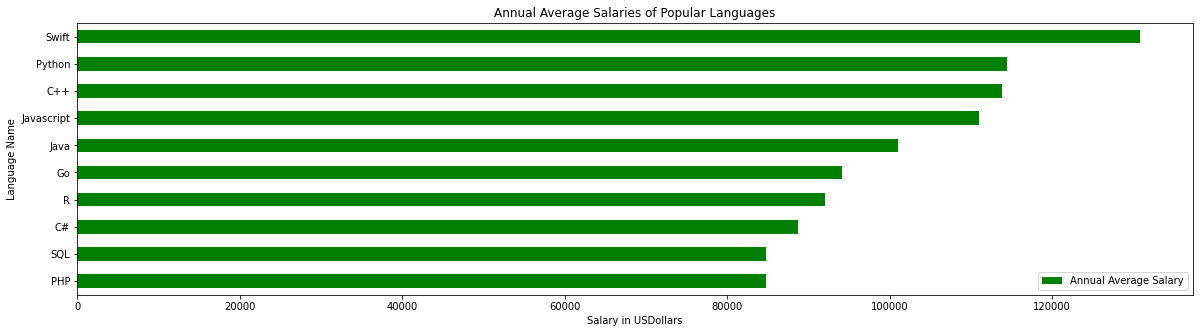

In [103]:
df.plot(kind='barh', figsize=(20, 5), color='green')
plt.xlabel('Salary in USDollars')
plt.ylabel('Language Name')
plt.title('Annual Average Salaries of Popular Languages')
plt.legend(['Annual Average Salary'], loc='lower right')
plt.show()

In [104]:
df.dtypes

Annual Average Salary    float64
dtype: object

In [105]:
df.loc[:, "Salary_in_USDollars"] ='$'+ df["Annual Average Salary"].map('{:,.0f}'.format)
df.loc[:, "Salary_in_USDollars"]


Language Name
PHP            $84,727
SQL            $84,793
C#             $88,726
R              $92,037
Go             $94,082
Java          $101,013
Javascript    $110,981
C++           $113,865
Python        $114,383
Swift         $130,801
Name: Salary_in_USDollars, dtype: object

In [112]:
df.sort_values(by=['Annual Average Salary'], ascending=False, inplace=True)

print(df)

               Annual Average Salary Salary_in_USDollars
Language Name                                           
Swift                       130801.0            $130,801
Python                      114383.0            $114,383
C++                         113865.0            $113,865
Javascript                  110981.0            $110,981
Java                        101013.0            $101,013
Go                           94082.0             $94,082
R                            92037.0             $92,037
C#                           88726.0             $88,726
SQL                          84793.0             $84,793
PHP                          84727.0             $84,727


In [113]:
df.head(5)

,Annual Average Salary,Salary_in_USDollars
Language Name,,
Swift,130801.0,"$130,801"
Python,114383.0,"$114,383"
C++,113865.0,"$113,865"
Javascript,110981.0,"$110,981"
Java,101013.0,"$101,013"


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
